Github: https://github.com/e-barrett

In [1]:
### Assignment activity 1: Make predictions with regression:

### What price should be set for the Lego sets with 8,000 Lego pieces? (Simple linear regression)
### What price should be set for the Lego sets with 8,000 Lego pieces that are most likely to be purchased by 
###.. 30-year-old customers? (Multiple linear regression)

In [2]:
# Import all the necessary packages and libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.stats.api as sms
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets 
from sklearn import linear_model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

In [3]:
# Read the '.csv' file
data = pd.read_csv('lego.csv') 

# View the head of the df
data.head() 

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20


In [4]:
# More info about the DataFrame
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12261 entries, 0 to 12260
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ages               12261 non-null  int64  
 1   list_price         12261 non-null  float64
 2   num_reviews        12261 non-null  int64  
 3   piece_count        12261 non-null  int64  
 4   play_star_rating   12261 non-null  float64
 5   review_difficulty  12261 non-null  int64  
 6   country            12261 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 670.6 KB


In [5]:
# Prints descriptive statistics
data.describe()  

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
count,12261.00000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000,12261.000000
mean,16.68828,65.141998,14.603050,493.405921,3.709689,1.988826,10.015333
std,8.21868,91.980429,34.356847,825.364580,1.641130,1.787565,6.185450
min,0.00000,2.272400,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11.00000,19.990000,1.000000,97.000000,3.600000,0.000000,4.000000
50%,19.00000,36.587800,4.000000,216.000000,4.400000,2.000000,10.000000
75%,23.00000,70.192200,11.000000,544.000000,4.700000,4.000000,15.000000
max,30.00000,1104.870000,367.000000,7541.000000,5.000000,5.000000,20.000000


In [6]:
# Look at the whole dataframe to get an idea of the data
pd.set_option('display.max_rows', None)

In [7]:
# Check for missing data
data.isnull().sum()

ages                 0
list_price           0
num_reviews          0
piece_count          0
play_star_rating     0
review_difficulty    0
country              0
dtype: int64

In [8]:
# Check for NaN data
np.isnan(data).values.sum()

0

In [9]:
# Looked at all of data, just data.head(30) left here to decrease file size
data.head(30)

,ages,list_price,num_reviews,piece_count,play_star_rating,review_difficulty,country
0,19,29.99,2,277,4.0,0,20
1,19,19.99,2,168,4.0,2,20
2,19,12.99,11,74,4.3,2,20
3,5,99.99,23,1032,3.6,0,20
4,5,79.99,14,744,3.2,1,20
5,5,59.99,7,597,3.7,0,20
6,5,59.99,37,598,3.7,0,20
7,5,49.99,24,780,4.4,0,20
8,5,39.99,23,468,3.6,0,20
9,5,39.99,11,444,3.6,0,20


In [10]:
# Check the distribution of the df
# Minimum values of the df
data.min()

ages                 0.0000
list_price           2.2724
num_reviews          0.0000
piece_count          1.0000
play_star_rating     0.0000
review_difficulty    0.0000
country              0.0000
dtype: float64

In [11]:
# Maximum values of the df
data.max()

ages                   30.00
list_price           1104.87
num_reviews           367.00
piece_count          7541.00
play_star_rating        5.00
review_difficulty       5.00
country                20.00
dtype: float64

Distribution of the data we are interested in:
 - Age: 0-30 - small in comparison to the other variables.
 - List price: 2.27-1104.87 - large, meaning there is a large amount of variability.
 - Piece count: 1-7541 - large, meaning there is a large armoung of variability.

In [12]:
# Check correlation of different variables 
print(data.corr())

                       ages  list_price  num_reviews  piece_count  \
ages               1.000000   -0.077782    -0.160950    -0.092585   
list_price        -0.077782    1.000000     0.459442     0.869630   
num_reviews       -0.160950    0.459442     1.000000     0.556345   
piece_count       -0.092585    0.869630     0.556345     1.000000   
play_star_rating   0.234272    0.139085     0.147900     0.167105   
review_difficulty -0.246311   -0.282117    -0.194921    -0.305679   
country           -0.004427    0.010377    -0.000245    -0.000428   

                   play_star_rating  review_difficulty   country  
ages                       0.234272          -0.246311 -0.004427  
list_price                 0.139085          -0.282117  0.010377  
num_reviews                0.147900          -0.194921 -0.000245  
piece_count                0.167105          -0.305679 -0.000428  
play_star_rating           1.000000          -0.664486 -0.002676  
review_difficulty         -0.664486          

<AxesSubplot:>

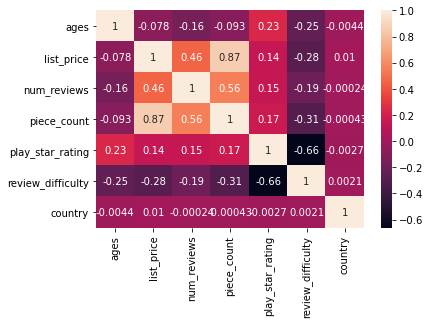

In [13]:
correlations = data.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True)

The correlation plot shows:
- a strong, positive correlation between 'piece count' and 'price' (0.87).
- a moderate, positive correlation between 'number of reviews' and 'price' (0.46).

Of note to the MLR:
- 'age' has a weak negative correlation with 'price' (-0.078).
- 'age' and 'piece count' don't have a strong correlation (-0.093). (Linear regression assumes that there is little or no correlation between the input values - otherwise, it overfits the data. Therefore there is low multicollinearity between these variables and that is ok for the MLR.


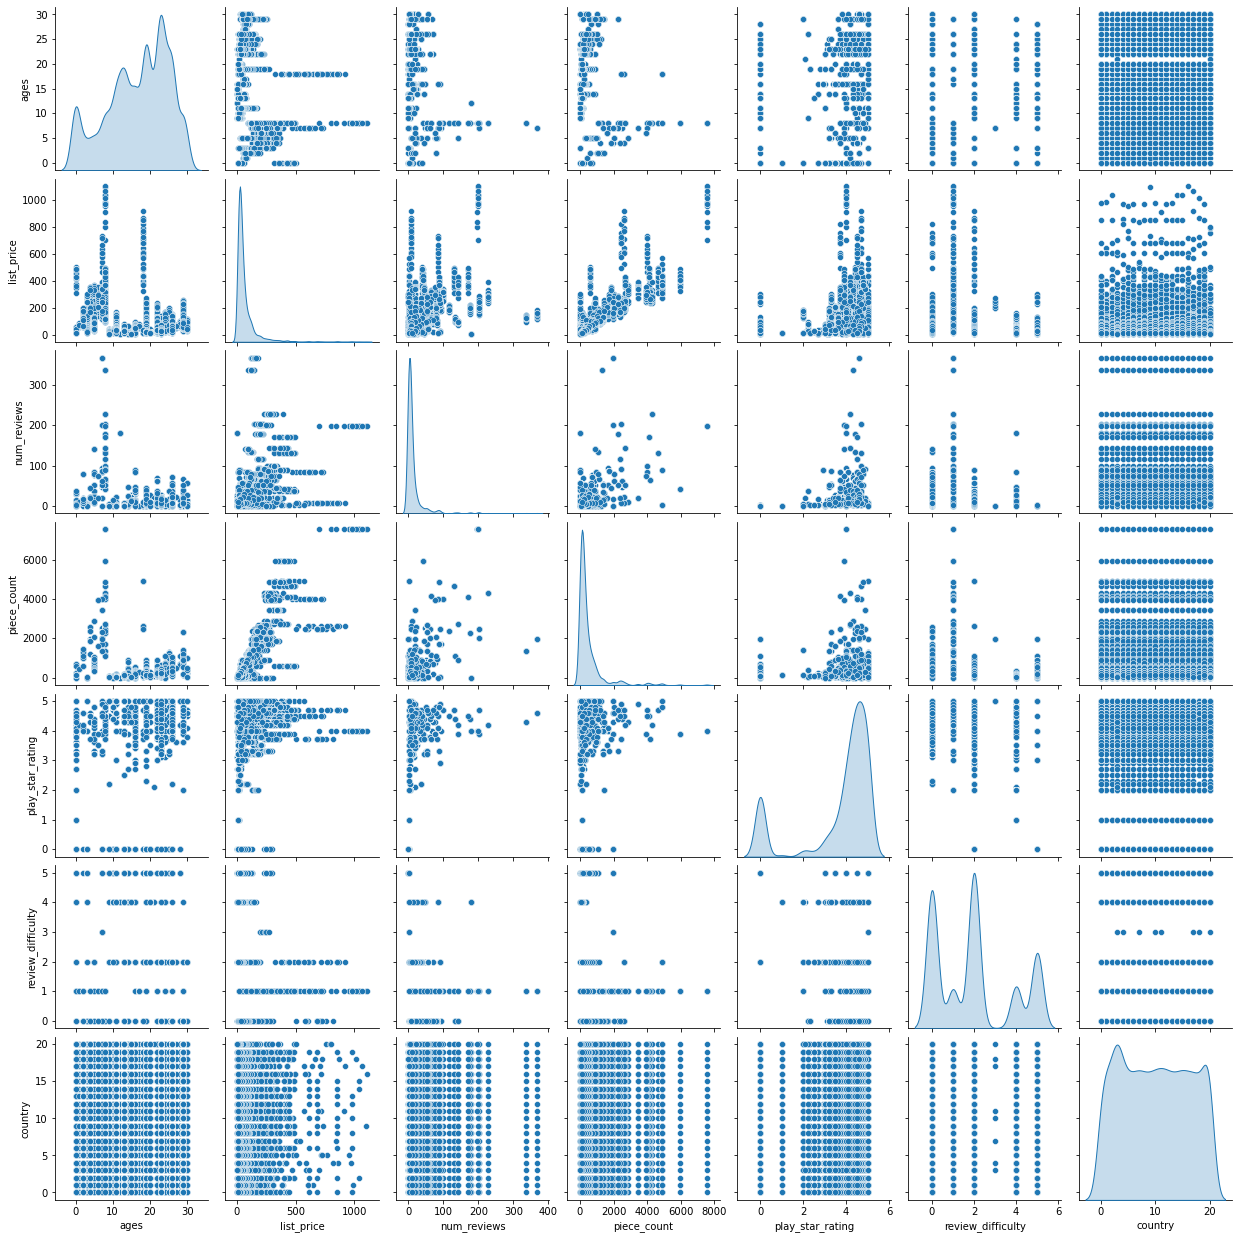

In [14]:
# Visualising all the data with pairplot
sns.pairplot(data=data, diag_kind='kde')

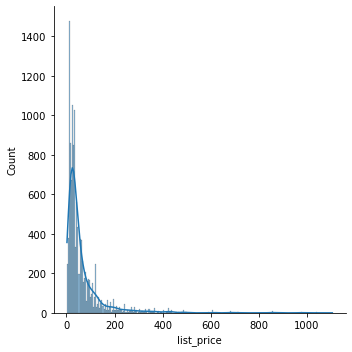

In [15]:
# Plot the list price with distribution plot and kde
sns.displot(data=data, x='list_price', kde=True)

- The distribution of the price data shows right/positive skewness and therefore is not normally distributed.

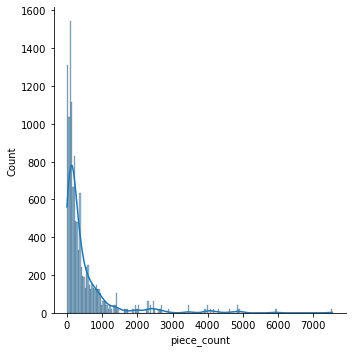

In [16]:
# Plot the piece count with distribution plot and kde
sns.displot(data=data, x='piece_count', kde=True)

- The distribution of the piece count data shows right/positive skewness and therefore is not normally distributed.
- Normalising the data would improve the accuracy of the regression model. 

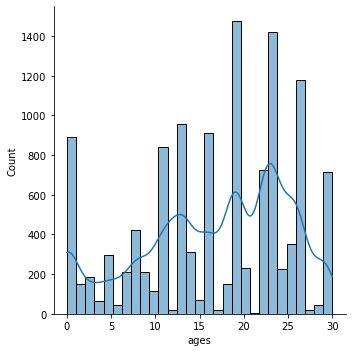

In [17]:
# Plot the piece count with distribution plot and kde
sns.displot(data=data, x='ages', kde=True)

- The distribution of the ages data shows left/negative skewness and therefore is not normally distributed.
- Normalising the data would improve the accuracy of the regression model. 

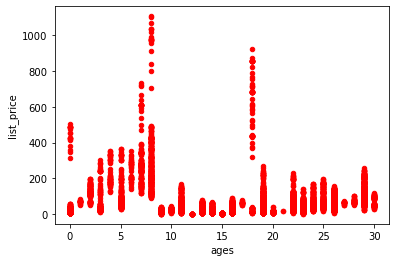

In [18]:
# Visualise the data: age vs. list price
data.plot(kind='scatter',x='ages',y='list_price',color='red')
plt.show()

- There doesn't appear to be a correlation between ages and list_price.

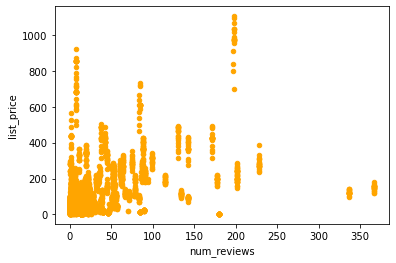

In [19]:
# Visualise the data: number of reviews vs. list price
data.plot(kind='scatter',x='num_reviews',y='list_price',color='orange')
plt.show()

- There appears to be a moderate, postive correlation between num_reviews and list_price.

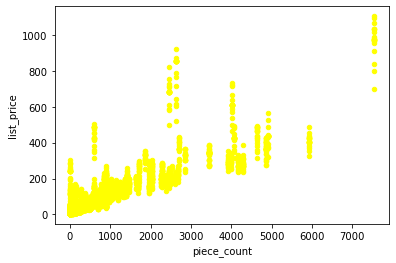

In [20]:
# Visualise the data: pieces vs. list price
data.plot(kind='scatter',x='piece_count',y='list_price',color='yellow')
plt.show()

- There appears to be a strong, postive correlation between piece_count and list_price.

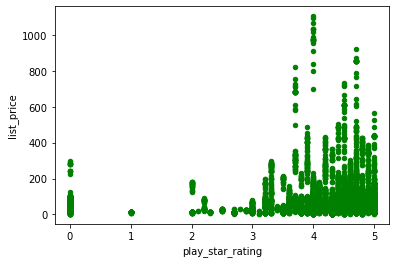

In [21]:
# Visualise the data: play star rating vs. list price
data.plot(kind='scatter',x='play_star_rating',y='list_price',color='green')
plt.show()

- There appears to be a moderate, positive correlation between play_star_rating and list_price.

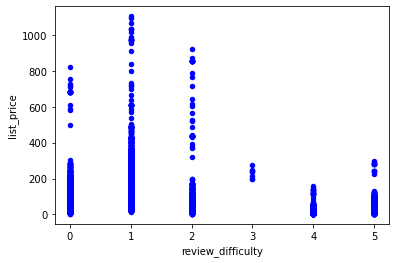

In [22]:
# Visualise the data: review dificulty vs. list price
data.plot(kind='scatter',x='review_difficulty',y='list_price',color='blue')
plt.show()

- There appears to be a weak, negative correlation between review_difficutly and list_price.

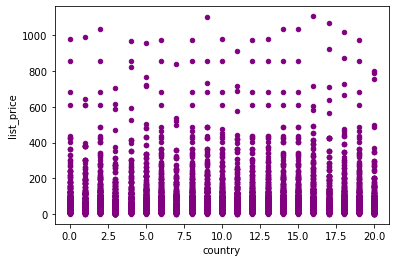

In [23]:
# Visualise the data: number of countries product in vs. list price
data.plot(kind='scatter',x='country',y='list_price',color='purple')
plt.show()

- There appears to be no correlation between number of countries and list_price. 

<AxesSubplot:xlabel='piece_count', ylabel='list_price'>

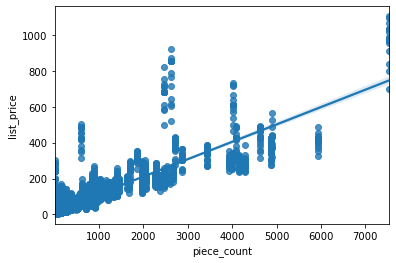

In [24]:
# Plot regression plot of pieces vs. list price
sns.regplot(x='piece_count',y='list_price',data=data)

- Plotting a regression line shows a postive correlation between piece_count and list_price. 
- There are quite a few outliers - which would need to be dealt with to create a more accurate regression. 

In [25]:
## Simple and multiple linear regression:

In [26]:
# Simple linear regression:

# Define the dependent variable
y = data['list_price'].values.reshape(-1, 1) 

# Define the independent variable
x = data['piece_count'].values.reshape(-1, 1) 

In [27]:
# Create  the subset (70/30) and control random_state
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.7, 
                                                 random_state=100) 

- We create train and test data to check the performance of the regression model on data not used to train the model. 

- The difference between training data vs. test data is: one trains a model, the other tests it (to confirms it works or doesn’t work correctly) with previously unseen data.

- If we do not create train and test data, we are unable to assess how the model will work on unknown inputs. It improves the results by allowing us to assess the accuracy of the model. 

In [28]:
lm = LinearRegression()

In [29]:
# Linear regression; fitting the model
lm.fit(x_train,y_train) 

LinearRegression()

In [30]:
# Predict the training set values
y_pred = lm.predict(x_train) 

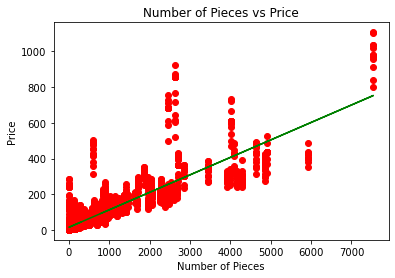

In [31]:
# [1] Create a scatterplot (with red data points)
plt.scatter(x_train, y_train, color = "red")  
# [2] Create a regression line in green
plt.plot(x_train, y_pred, color = "green")
# [3] Set the title for the graph
plt.title("Number of Pieces vs Price")
# [4] Set the label for the x-axis 
plt.xlabel("Number of Pieces")
# [5] Set the label for the y-axis  
plt.ylabel("Price") 
# [6] Print the graph
plt.show() 

In [32]:
# Print R-squared value of the training data
print(lm.score(x_train,y_train)) 

0.7644351150518354


Training data set:
- An R-squared score of 0.7644 indicates that 76.44% of the variability observed in the price can be explained by variability in the piece count.

In [33]:
# Print the intercept value
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value
print("Coefficient value: ", lm.coef_) 

Intercept value:  [17.02159751]
Coefficient value:  [[0.09744347]]


In [34]:
# Calculate the MAE, MSE, RMSE for the train data
mae = mean_absolute_error(y_train, y_pred)
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)

In [35]:
# Print the MAE, MSE, RMSE for the train data
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 20.49
Mean squared error: 2024.31
Root mean squared error: 44.99


In [36]:
# Linear regression; fitting the model
lm.fit(x_test,y_test) 

LinearRegression()

In [37]:
# Predict the test set values
y_pred = lm.predict(x_test) 

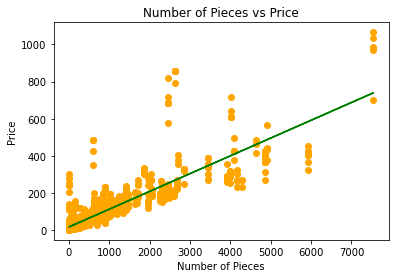

In [38]:
# [1] Create a scatterplot (with orange data points)
plt.scatter(x_test, y_test, color = "orange")  
# [2] Create a regression line in green
plt.plot(x_test, y_pred, color = "green")
# [3] Set the title for the graph
plt.title("Number of Pieces vs Price")
# [4] Set the label for the x-axis  
plt.xlabel("Number of Pieces")
# [5] Set the label for the y-axis   
plt.ylabel("Price") 
# [6] Print the graph
plt.show() 

In [39]:
# Print R-squared value of the test data
print(lm.score(x_test,y_test)) 

0.736283806932537


Test data set:
- An R-squared score of 0.7362 indicates that 73.62% of the variability observed in the price can be explained by variability in the piece count.

In [40]:
# Print the intercept value
print("Intercept value: ", lm.intercept_) 
# Print the coefficient value
print("Coefficient value: ", lm.coef_)

Intercept value:  [18.04263613]
Coefficient value:  [[0.09561197]]


In [41]:
# Calculate the MAE, MSE, RMSE for the test data
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [42]:
# Print the MAE, MSE, RMSE for the test data
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 20.72
Mean squared error: 2148.34
Root mean squared error: 46.35


Comparing MAE, MSE and RMSE between training and test data sets:
- MAE: training = 20.49, testing = 20.72. 
- MSE: training = 2024.31, testing = 2148.54
- RMSE: training = 44.99, testing = 46.35

- The fact that the scores are similar for both the training and test data sets is good, as a big difference could indicate a problem with the model. 

- The MAE is not low (zero is ideal). On average, our model predicitions are off by 20.49 for the training set and 20.72 for the test set for list_price. As the list_price varies from 2.27-1104.87 and the implications for the error are low, I believe that this level of error is acceptable.

- The MSE is quite high for both data sets, which means there are some large errors in the model. 

- There is a moderate difference between the MAE and the RMSE for both the training and the test sets, and it shows that the errors vary in magnitude. 

In [43]:
# Make predictions
New_Value1 = 8000
print ('Predicted Value: \n', lm.predict([[New_Value1]]))  

Predicted Value: 
 [[782.93836492]]


Using simple linear regression, the predicted price for a 8000 piece Lego set is: 782.94.

In [44]:
# Multiple linear regression:

In [45]:
# Define the dependent variable
y = data['list_price']

# Define the independent variables
X = data[['piece_count', 'ages']]

In [46]:
# Create  the subset (70/30) and control random_state
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [47]:
# Fit model to training set
mlr = LinearRegression()  
mlr.fit(X_train, y_train)

LinearRegression()

In [48]:
# Predict the training set values
mlr.predict(X_train)

array([ 94.33018165, 146.18236432,  17.2044989 , ...,  23.28063919,
        74.44140892,  45.95327683])

In [49]:
# Checking the value of R-squared, intercept and coefficients
print("R-squared: ", mlr.score(X_train, y_train))
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x_train, mlr.coef_))

R-squared:  0.7644359915322901
Intercept:  16.84044731259106
Coefficients:


[(array([792]), 0.09745348450200038), (array([1327]), 0.010571538500851458)]

In [50]:
# Create summary for training set
model = sm.OLS(y_train, sm.add_constant(X_train)).fit()
Y_pred = model.predict(sm.add_constant(X_train))
print_model = model.summary()

print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.764
Model:                            OLS   Adj. R-squared:                  0.764
Method:                 Least Squares   F-statistic:                 1.392e+04
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:32:34   Log-Likelihood:                -44845.
No. Observations:                8582   AIC:                         8.970e+04
Df Residuals:                    8579   BIC:                         8.972e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.8404      1.161     14.501      

In [51]:
# Predict the training set values
y_pred_mlr= mlr.predict(X_train)
print("Prediction for training set: {}".format(y_pred_mlr))

Prediction for training set: [ 94.33018165 146.18236432  17.2044989  ...  23.28063919  74.44140892
  45.95327683]


In [52]:
# Calculate the MAE, MSE, RMSE for the train data
mae = mean_absolute_error(y_train, y_pred_mlr)
mse = mean_squared_error(y_train, y_pred_mlr)
rmse = np.sqrt(mse)

In [53]:
# Print the MAE, MSE, RMSE for the train data
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 20.48
Mean squared error: 2024.31
Root mean squared error: 44.99


In [54]:
# Print r-squared for training set
print(mlr.score(X_train,y_train)*100)

76.44359915322902


In [55]:
# Run regression on the test subset
mlr = LinearRegression()  
mlr.fit(X_test, y_test)

LinearRegression()

In [56]:
# Create summary for test set
model = sm.OLS(y_test, sm.add_constant(X_test)).fit()
Y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     5133.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:32:34   Log-Likelihood:                -19333.
No. Observations:                3679   AIC:                         3.867e+04
Df Residuals:                    3676   BIC:                         3.869e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.6652      1.844      9.037      

In [57]:
# Predict the test set values
y_pred_mlr= mlr.predict(X_test)
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [23.73662821 31.42837803 54.21581296 ... 69.46310908 71.95080955
 31.97411157]


In [58]:
# Calculate the MAE, MSE, RMSE for the test data
mae = mean_absolute_error(y_test, y_pred_mlr)
mse = mean_squared_error(y_test, y_pred_mlr)
rmse = np.sqrt(mse)

In [59]:
# Print the MAE, MSE, RMSE for the test data
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 20.69
Mean squared error: 2147.92
Root mean squared error: 46.35


Comparing MAE, MSE and RMSE between training and test data sets:
- MAE: training = 20.48, testing = 20.69. 
- MSE: training = 2024.31, testing = 2147.92
- RMSE: training = 44.99, testing = 46.35

- The fact that the scores are similar for both the training and test data sets is good, as a big difference could indicate a problem with the model. 

- The MAE is not low (zero is ideal). On average, our model predicitions are off by 20.48 for the training set and 20.69 for the test set for list_price. As the list_price varies from 2.27-1104.87 and the implications for the error are low, I believe that this level of error is acceptable.

- The MSE is quite high for both data sets, which means there are some large errors in the model. 

- There is a moderate difference between the MAE and the RMSE for both the training and the test sets, and it shows that the errors vary in magnitude. 

In [60]:
# Create summary for test set
model = sm.OLS(y_test, sm.add_constant(X_test)).fit()
Y_pred = model.predict(sm.add_constant(X_test))
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             list_price   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.736
Method:                 Least Squares   F-statistic:                     5133.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        17:32:34   Log-Likelihood:                -19333.
No. Observations:                3679   AIC:                         3.867e+04
Df Residuals:                    3676   BIC:                         3.869e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          16.6652      1.844      9.037      

- The Durbin-Watson score of 2.025 is close to 2 which suggests low-no autcorrelation in the test data.

In [61]:
# Print r squared score for test set
print(mlr.score(X_test,y_test)*100)

73.63359683763863


- An R-squared score of 73.63% indicates that 73.63% of the variability observed in the price can be explained by variability in the piece count and the ages.

In [62]:
# Checking for multicolinearity
x_temp = sm.add_constant(X_train) # [1] Add a constant.
vif = pd.DataFrame() # [2] Create an empty DataFrame.
vif["VIF Factor"] = [variance_inflation_factor(x_temp.values, i) for i in range(x_temp.values.shape[1])] # Calculate the ///
vif["features"] = x_temp.columns # [4] Create the feature columns.
print(vif.round(2)) # [5] Print the values to two decimal points.

   VIF Factor     features
0        5.72        const
1        1.01  piece_count
2        1.01         ages


- Because the VIF Factor is very close to one, there is no to little correlation between the independent variable and any others and therefore no multicolinearity.

In [63]:
# Checking for heteroscedasticity
model = sms.het_breuschpagan(model.resid, model.model.exog) 

In [64]:
# Printing results
terms = ['LM stat', 'LM Test p-value', 'F-stat', 'F-test p-value']
print(dict(zip(terms, model)))

{'LM stat': 291.37294089292106, 'LM Test p-value': 5.3600618015619936e-64, 'F-stat': 158.08808231161933, 'F-test p-value': 1.370093646198168e-66}


- The Lagrange multiplier statistic for the test is 291.37 and the corresponding p-value is 5.36. Because this p-value is not less than 0.05, we fail to reject the null hypothesis. We do not have sufficient evidence to say that heteroscedasticity is present in the regression model.

In [65]:
# Make predictions 
New_Value1 = 8000
New_Value2 = 30
print ('Predicted Value: \n', mlr.predict([[New_Value1 ,New_Value2]])) 

Predicted Value: 
 [784.51968589]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Using multiple linear regression, the predicted price for a 8000 piece Lego set that is most likely to be purchased by 30 year old customers is: 784.52.